## CCNSS 2018 Module 4: High dimensional representations and neural dynamics
# Tutorial 3: Encoding and data analysis

[source](https://colab.research.google.com/drive/1N5sbssbgyyGqW4k2XgOdJNmB7MPhmgBZ)




```
# This is formatted as code
```

*Please execute the cells bellow in order to initialize the notebook environment*

In [1]:
!if [ ! -f homework_2_utils.py ]; then git clone https://github.com/ccnss/ccnss2018_students; \
                        cp -rf ccnss2018_students/module4/3_encoding/homework_2_utils.py ./; \
                        cp -rf ccnss2018_students/module4/3_encoding/npp.py ./; fi

In [2]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import math                        # import basic math functions
import random                      # import basic random number generator functions
from homework_2_utils import make_data

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

# Objectives

In this notebook we will introduce data analysis techniques commonly used when  analyzing and interpreting fMRI data. 

# Background

Encoding and decoding are complementary operations: encoding uses stimuli to predict activity while decoding uses activity to predict information about the stimuli.

###Encoding###

Encoding models  consist of several distinct components. First is the set of stimuli (or the various
task conditions) used in the experiment. For example, most fMRI studies use stimuli drawn from
discrete classes such as faces or houses (Downing et al., 2006), or they
probe discrete levels of a cognitive variable such as the allocation of
spatial attention to several different locations (Brefczynski and DeYoe,
1999). The second component is a set of features that describes the
abstract relationship between stimuli and responses. The features consist of labels that reflect different levels of the
independent variable (e.g. faces versus houses, different locations of
attention, etc.). The third component is one or more regions of interest
(ROI) in the brain from which voxels are selected. The final
component is the algorithm that is actually used to estimate the
model from the data. 

##Decoding##


The linear classifier is an
algorithm that uses patterns of activity across an array of voxels to
discriminate between different levels of stimulus, experimental or
task variables. Because classifiers exploit systematic differences in
voxel selectivity within a region of interest (ROI), in principle they can
detect information that would be missed by conventional analyses
that involve spatial averaging. A linear classifier can be viewed as one specific and restricted form
of a decoding model, a model that uses voxel activity to predict
sensory, cognitive, or motor information.



## Exercises##

In the following exercises, we will explore linear regression through gradient descent as well ridge regression. Finally, from exercise 4 onwards, we will implement these ideas for the comparison between different hypotheses on how well they explain data. 



**EXERCISE 1**

- The function gd_make_data below simulates a two-dimensional stimulus and a response of a system (e.g., population of neurons).



In [3]:
def gd_make_data(nsamp=100, noise=0):    
    # Generate a two dimensional stimulus (e.g two pixels) with correlations and 100 samples (e.g. points in time)
    # First pixel data
    np.random.seed(2)
    x1 = np.random.randn(nsamp)

    # Second pixel that is correlated with the first
    x2 = .4 * x1 + .6 * np.random.randn(nsamp)

    # Concatinate into a stimulus matrix - here rows are dimensions and columns are time points.
    x = np.vstack([x1, x2])

    ## Generate weights and the corresponding one dimensional response 
    # Set weights on each channel
    b = np.array([1, 7])

    # Make response of system - this is the output of our toy neuron
    y = np.dot(x.T, b) + np.random.randn(nsamp) * noise
    
    return x, y



- Extract the two variables x and y, and plot y as a function of x. Try different levels of noise (noise = 1, 2, 10). However, we will work with the noiseless case. 


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2, 100) (100,)


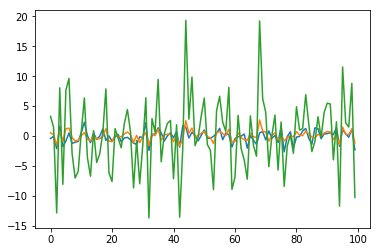

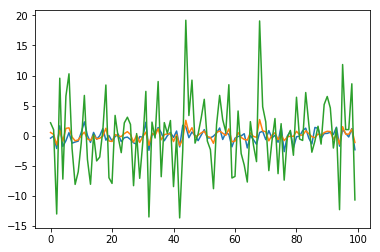

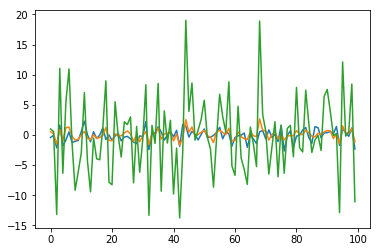

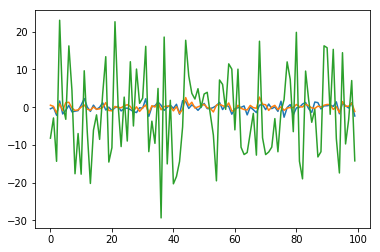

In [7]:
x, y = gd_make_data()
print(type(x), type(y))
print(x.shape, y.shape)

#Insert code here
for i in (0, 1, 2, 10):
    x, y = gd_make_data(noise=i)
    plt.plot(np.arange(x.shape[1]), x[0,:])
    plt.plot(np.arange(x.shape[1]), x[1,:])
    plt.plot(np.arange(x.shape[1]), y)
    plt.show()



### Expected output ###


![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/3_encoding/figures/Mod4T4E1.png)


**EXERCISE 2**

Suppose you have only access to the observation/response given by the vector 'y' from the previous exercise (for the noise = 0 case). One way to estimate the weights beta that connect stimulus to response is using gradient descent. For this problem, the features are in the variable `x`, and the response is in the variable `y`.


In this exercise, you will use gradient descent to solve this problem. You will do this in several steps. 

- First we we will define the error landscape. For this, we define a set of weights, i.e., the parameter space. We use the function np.meshgrid with two arguments for each of the dimensions of the stimulus. 

Calculate the squared error between the true response, y, and the estimated responses ys. Call this variable err. 


In [12]:
## Insert your code here
'''Hint: use the following b1, b2 = np.meshgrid(np.arange(-1, 10, .2), np.arange(-1, 10, .2))
   to calculate the error you can concantenate b1 and b2
'''
b1, b2 = np.meshgrid(np.arange(-1, 10, .2), np.arange(-1, 10, .2))

def err(b1, b2, x, y):
    n = len(y)
    py = b1*x[0,:] + b2*x[1,:]
    return np.sum((py - y)**2)/n

print(b1)
print(b2.shape)

[[-1.  -0.8 -0.6 ...  9.4  9.6  9.8]
 [-1.  -0.8 -0.6 ...  9.4  9.6  9.8]
 [-1.  -0.8 -0.6 ...  9.4  9.6  9.8]
 ...
 [-1.  -0.8 -0.6 ...  9.4  9.6  9.8]
 [-1.  -0.8 -0.6 ...  9.4  9.6  9.8]
 [-1.  -0.8 -0.6 ...  9.4  9.6  9.8]]
(55, 55)


- Plot the contour of error surface. Hint: Use the function plt.contour with arguments b1, b2, and the error you calculated, but first reshape for plotting, e.g., errfun = err.reshape(b1.shape) 

225.34903037791548
95.34912233348507


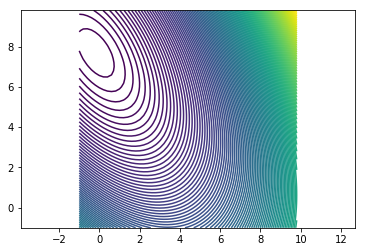

In [23]:
# Insert your code here
level = np.zeros((55, 55))
b1r = np.arange(-1, 10, .2)
b2r = np.arange(-1, 10, .2)
for i in range(55):
    for j in range(55):
        level[j, i] = err(b1r[i], b2r[j], x, y)
        
print(np.max(level))
print(np.min(level))
        
plt.axis('equal')
plt.contour(b1, b2, level, levels=np.arange(90, 250,1))
plt.show()

### Expected output ###



![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/3_encoding/figures/Mod4T4E2.png)


**EXERCISE 3**

- Now we will use gradient descent on the error to estimate values of b1 and b2. For gradient descent,  we update the value of the parameters B as:



$$B_{new} = B_{old}+ \alpha(Bx-y)x/m$$

where $\alpha$ is the learning rate/ step size and m is the length (number of samples) of Y. Note that this update rule is based on the derivative (gradient) of the error with respect to B. 

$$Error (B) = (Bx-y)^2/(2*m)$$


In our case, B is composed of b1 and b2. Estimate the  values of b1 and b2 for  10, 20, and 150 steps and use a step size of 0.1. Print the values of b1 and b2 for these step sizes. 


- Plot the contour of the error surface and your regression path. Where is it converging to? 

225.34903037791548
95.34912233348507


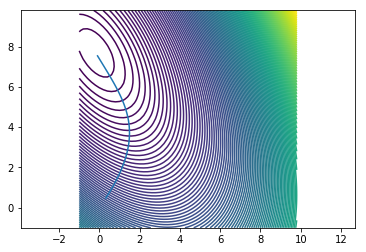

[-0.09250189  7.53912656]


In [39]:
level = np.zeros((55, 55))
b1r = np.arange(-1, 10, .2)
b2r = np.arange(-1, 10, .2)
for i in range(55):
    for j in range(55):
        level[j, i] = err(b1r[i], b2r[j], x, y)
        
print(np.max(level))
print(np.min(level))

B = np.array([0.0, 0.0])
alpha = 0.1
B_hist = np.zeros((100, 2))


for step in range(100):
    B = B - alpha * np.dot((np.dot(B, x)-y), np.transpose(x))/len(y)

    B_hist[step, :] = B
        
plt.axis('equal')
plt.contour(b1, b2, level, levels=np.arange(90, 250,1))

plt.plot(B_hist[:,0], B_hist[:, 1])
plt.show()
print(B)

### Expected output ###



![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/3_encoding/figures/Mod4T4E3.png)


- The MSE is defined as the difference between the estimated y via your estimated weights b1 and b2 and the true value of y. Calculate and plot the mean squared error (MSE) as a function of step size.  

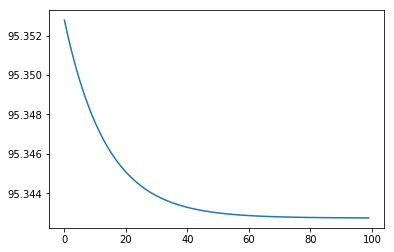

In [40]:
mse_hist= np.zeros(100)

for step in range(100):
    B = B - alpha * np.dot((np.dot(B, x)-y), np.transpose(x))/len(y)
    mse_hist[step] = err(B[0], B[1], x, y)
    
plt.plot(mse_hist)
plt.show()

### Expected output ###



![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/3_encoding/figures/Mod4T4E3b.png)


**EXERCISE 4**

In this exercise we will introduce the concept of linearizing feature spaces. Given a set of responses (e.g., voxels), it is apriori unclear what features of the stimuli are being encoded. 

Suppose you've done an experiment and measured responses to a bunch of stimuli. You've got three different hypotheses about how the stimuli might be represented in the responses. You instantiate these hypotheses as three different linearizing transforms, giving you three different sets of features that you can extract:  X1,  X2, and  X3 (in variables called x1, x2, and x3).
Feature space  X1 has 12 features,  X2 has 50 features, and  X3 has 100 features.
Note that you've recorded  m = 35 different responses (i.e.  Y is an  n×m matrix). Think of these as m different neurons or m different voxels.


First execute the cell below that will simulate the data. Print the shapes of the variables x1, x2, x3 and Y for both training and test. We will initally work with the training set. 

In [41]:
from homework_2_utils import make_data

num_training = 500 # total number of datapoints in training set
num_test = 100 # total number of datapoints in test set
num_features = [12, 50, 100] # number of features in each feature space
num_responses = 35 # number of responses (voxels or neurons)

# This is just a bunch of constants. don't worry about what they mean for now
combs = [[0, 3, 4, 6],
         [1, 3, 5, 6],
         [2, 4, 5, 6]]
true_variances = np.array([300, 0, 1500, 250, 250, 4000, 500]).astype(float)
total_variance = 0.3
true_variances = true_variances / true_variances.sum() * total_variance
noise_variance = 1 - true_variances.sum()
P_parts = [3] * 7
Pnoise_models = [P - np.array(P_parts)[c].sum() for P,c in zip(num_features, combs)]

# Generate the data!
[x1_total, x2_total, x3_total], Y_total = make_data(num_training, num_test, P_parts, 
                                                    num_responses, true_variances, 
                                                    noise_variance, combs, Pnoise_models, 
                                                    num_features)

x1 = x1_total.T[:num_training]
x2 = x2_total.T[:num_training]
x3 = x3_total.T[:num_training]
Y = Y_total[:num_training]

x1_test = x1_total.T[num_training:]
x2_test = x2_total.T[num_training:]
x3_test = x3_total.T[num_training:]
Y_test = Y_total[num_training:]

In [42]:
print('x1 shape:', x1.shape)
print('x2 shape:', x2.shape)
print('x3 shape:', x3.shape)
print('Y shape:', Y.shape)

print('x1_test shape:', x1_test.shape)
print('x2_test shape:', x2_test.shape)
print('x3_test shape:', x3_test.shape)
print('Y_test shape:', Y_test.shape)

x1 shape: (500, 12)
x2 shape: (500, 50)
x3 shape: (500, 100)
Y shape: (500, 35)
x1_test shape: (100, 12)
x2_test shape: (100, 50)
x3_test shape: (100, 100)
Y_test shape: (100, 35)


### Expected output ###
```
x1 shape: (500, 12)
x2 shape: (500, 50)
x3 shape: (500, 100)
Y shape: (500, 35)
x1_test shape: (100, 12)
x2_test shape: (100, 50)
x3_test shape: (100, 100)
Y_test shape: (100, 35)
```


##Model Comparison

In these exercises we will use ridge regression to fit models and cross-validation to choose the best model in terms of how well it explains data and how well it generalizes to new data. 



### Exercise 5###

Ridge regression is implemented as adding the ridge component ($\lambda B^2$) to the error function, which amounts to adding a linear term  $\lambda B$ to the update equations. 

Using the training set, create a function ridge_reg that calculates regression parameters for the first response (Y[:,0]) given the hypothesis x1 and a value of the ridge parameter lambda. 
Print the estimated regression parameters for three values of lambda: lambda = 0, 30, 500 and plot them on top of each other. 

What happens as lambda increases? Suggestion: Modify the function created for linear regression. To account for the offset of the regression parameters (b_0), you will need to insert a column of ones to your feature space x1. Hint: use the function np.insert





In [50]:
def ridge_reg(lamb, matrix_X,output,steps, eps):
    #steps = 1000
    #eps = 0.01
    b_new = np.zeros((steps,np.shape(matrix_X)[1]+1))
    b_ridge = np.zeros(np.shape(matrix_X)[1]+1)
    
    newx = matrix_X
    print(newx.shape)
    newx = np.insert(newx,0,1.0,axis=1)
    print(newx.shape)
    print(b_ridge.shape)
    print(np.dot(newx,b_ridge).shape)
    print(output.shape)
    inner = np.dot(newx,b_ridge)-output
    num = (len(output))
    
    for ii in np.arange(1,steps):
        deriv1 = 1/num*(np.matmul(newx.T,inner) + lamb*b_ridge)
        
        b_new[ii,:] = b_new[ii-1,:]-eps*deriv1#np.array([b1[ii],b2[ii]])
        inner = np.dot(newx,b_ridge)-output
        b_ridge = b_new[ii,:]
        error = 1/(2*num)*(np.matmul(inner.T,inner)+lamb*np.matmul(b_ridge.T,b_ridge))
    return b_ridge, error

print(x1.shape)

b_ridge, error = ridge_reg(0, x1, Y, 1000, 0.01)

(500, 12)
(500, 12)
(500, 13)
(13,)
(500,)
(500, 35)


ValueError: operands could not be broadcast together with shapes (500,) (500,35) 

### Expected output ###

```
b_est = [ 0.00917125  0.01413807 -0.16057111 -0.06141426  0.17318263  0.11684469
  0.31305861  0.25650786  0.18476965  0.09313252  0.17000382 -0.0114288
  0.12844927]

b_est = [ 0.00880908  0.01684649 -0.12671214 -0.04726177  0.11554028  0.09028986
  0.25513857  0.19764594  0.1436277   0.0685549   0.14035239 -0.02226684
  0.09317462]

b_est = [ 4.19229059e-03  1.64933884e-02 -4.32852182e-02 -2.29907184e-02
  8.43419791e-05  1.44051549e-02  7.62944092e-02  4.06679770e-02
  4.67089236e-02  1.63980014e-02  3.95663161e-02 -4.01506593e-02
  5.06377314e-03] ```









![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/3_encoding/figures/Mod4T4E4.png)


- Calculate the regression parameters for the same values of lambda via the closed form solution:
$$B_{\rm ridge} = (X^TX+\lambda I_p)^{-1}X^Ty$$
and check that they give you(approximately) the same solution as the solution from the gradient descent.


### Expected output ####

```
b_est = [ 0.00917125  0.01413807 -0.16057111 -0.06141426  0.17318263  0.11684469
  0.31305861  0.25650786  0.18476965  0.09313252  0.17000382 -0.0114288
  0.12844927]
b_anal = (array([ 0.00946298,  0.03213538, -0.26416431, -0.156116  ,  0.36019483,
        0.04595873,  0.21284559,  0.2900416 ,  0.19908108,  0.12238487,
        0.06759392, -0.10062252,  0.0968257 ]), 0.475917092515256)
b_est = [ 0.00880908  0.01684649 -0.12671214 -0.04726177  0.11554028  0.09028986
  0.25513857  0.19764594  0.1436277   0.0685549   0.14035239 -0.02226684
  0.09317462]
b_anal = (array([ 0.00880952,  0.0168734 , -0.12686746, -0.04740365,  0.11582068,
        0.09018392,  0.25498894,  0.19769655,  0.14364944,  0.06859888,
        0.14019926, -0.02240027,  0.09312754]), 0.48361980985540487)
b_est = [ 4.19229059e-03  1.64933884e-02 -4.32852182e-02 -2.29907184e-02
  8.43419791e-05  1.44051549e-02  7.62944092e-02  4.06679770e-02
  4.67089236e-02  1.63980014e-02  3.95663161e-02 -4.01506593e-02
  5.06377314e-03]
b_anal = (array([ 4.19229059e-03,  1.64933884e-02, -4.32852182e-02, -2.29907184e-02,
        8.43419791e-05,  1.44051549e-02,  7.62944092e-02,  4.06679770e-02,
        4.67089236e-02,  1.63980014e-02,  3.95663161e-02, -4.01506593e-02,
        5.06377314e-03]), 0.5073323994783477)
        ```

### Exercise 6###


In the previous exercise we explored the concept of ridge regression for one response. In this exercise we will use ridge regression to find an optimal value of lambda for each of the three spaces (hypotheses) for the whole training set. We will do this in a series of steps:

First we will divide the training part of the data set (500 training samples) into k samples of equal size. 

- Write a function that returns k data subsets of the original data set. This means that this function would transform  the input x1 into an array of dimensions: (k,500/k,12) and transform Y into an array of dimensions (k,500/k,35). Print these shapes (for the input x and the output y). Hint: You could use the function np.random.choice(array, shape) with arguments array (1-D array of indices) and shape (k times the size of each subset).



In [0]:
## Insert code here
def k_subsets(n_folds, x, y)
    '''
    n_folds: the number of folds
    x: input hypothesis
    y: output
    
    returns kx and ky, which arrays of dimensions (k,500/k,12) (k,500,k,35)
    
    '''
    np.random.seed(30)
    k_x = np.zeros((k,int(lenlist/k),featsize)) ### lenlist is the number of samples (500), featsize is the number of features: 12
    k_y = np.zeros((k,int(lenlist/k),leny))  ### leny is the number of responses(35)
  ## Insert code here
  
    return kx, ky
    

### Expected output ####
```kxshape = (5, 100, 12) kyshape = (5, 100, 35)
```


- second, we choose one of the k subsets (or "folds") as our validation set (within training) and the remaining k-1 folds as our training set. How many validation-training sets are there? The objective is to find the optimal value of lambda for each hypothesis. 

For each value of i = 1, 2, . .. k, we loop over the different lambdas and we 1) perform ridge regression (obtain parameters B) using the training set composed of the k-1 folds and 2) test our obtained parameters on the fold k. For each test, we calculate a MSE as a function of lambda. Note that there are k tests in total. Since there are m = 35 responses, we average over these responses. 

Write a function get_MSE that, for a given value of lambda, loops over the k different training sets and performs a ridge regression. The output of the function is the matrix of parameters B. Use the analytical form of your ridge regression function to estimate the parameters B. Moreover,  use lambdas = np.logspace(1,7,15)







In [0]:
###Insert code. This is just a suggested structure
def get_MSE(train_input, train_output, nfolds, model):
    lambdas = np.logspace(1,7,15)
    
    
    error_array = np.zeros((nfolds,len(lambdas))) 
    
    for k_index in range(nfolds):
       
        
        for lam_index, lam in enumerate(lambdas):
            b_ridge = 
            error_array[k_index,lam_index] = error
    return error_array

plots the average MSE as a function of different values of lambda.

### Expected output ###


![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/3_encoding/figures/Mod4T4E5.png)


- You can now loop over the different hypotheses and caculate the MSE vs lambda plot for each hypothesis x1, x2, x3. 

 ### Expected output ###
 
![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/3_encoding/figures/Mod4T4E6.png)


- From the plots you have, we can calculate the optimal lambda.


### Expected output ####

```
lambda1 = 517.9474679231213 lambda2 =  1389.4954943731375 lambda3  = 26826.957952797275

```


Use the optimal lambda for each model to fit the test data (the data with the 100 samples). Calculate the MSE for each model? Which is the best model?

### Expected output ###
```
error1 = 0.9540706491596064 error2 = 0.8712352038422592 error3 = 0.8664830485523201

```
